In [1]:
import pandas as pd 
import numpy as np
import math
from utlis import *


tmp = pd.read_csv('Weed_Resistance_Data.csv', sep = ',', header=None)
params_in = list(tmp[:21][0])


params_in = np.array(params_in)

In [2]:
General_TillingFrequency = np.loadtxt('Corteva/BMP_Matlab_Code/Tilling_Data.txt')
Herbicide_data = np.loadtxt('Corteva/BMP_Matlab_Code/Herbicide_Data.txt')

In [3]:
newCult = np.ones_like(Params.Cultivation.survivalFraction)

# Params.Cultivation.survivalFraction

In [4]:
TillingFreq = np.zeros(nYears,)
# TillingFreq[7] = 1

TillingFreq

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
# herbicide_alter = []
# h = [.88,.3,.02]

# for i in range(nYears):
#     if i % 2 == 0:
#         herbicide_alter.append(h)
#     else:
#         herbicide_alter.append([0,0,0])


In [8]:
hand_surv = np.ones_like(Params.Hand.survivalFraction)

for i in range(nYears):
    if i % 3 == 0:
        hand_surv[i] = .95
    else:
        hand_surv[i] = .99

hand_surv        

array([[0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95],
       [0.99],
       [0.99],
       [0.95]])

In [6]:
from utlis import PrepareParams
import numpy as np 
from scipy import integrate




a = 1
Params = PrepareParams()

nYears = int(Params.General.nYears)
nCohorts = int(Params.General.nCohorts)

# nYears = 25
# nCohorts = 2
print("starting year and cohort are: ", nYears, " & ", nCohorts)

H1_eff = [.55,.1,.01]
H2_eff = [0,0,0]
H3_eff = [0,0,0]
H4_eff = [0,0,0]

strat = []
overall = []
risk_integral_all = []
seedbank_plot = []


for i in range(50):
    Population.seedBank = np.zeros((nYears,nGeno,nCohorts))
    # %Lower seed bank density
    Population.lowerBank = np.zeros((nYears,nGeno))
    # %immigrant seed
    Population.immSeed = np.zeros((nYears,nGeno,nCohorts))
    # %emigrant seed
    Population.emSeed = np.zeros((nYears,nGeno,nCohorts))
    # %germination storage
    Population.germination = np.zeros((nYears,nGeno,nCohorts))
    # %ungerminated storage
    Population.ungerminated = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide1 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide2 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide3 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide4 = np.zeros((nYears,nGeno,nCohorts))
    Population.seedProd = np.zeros((nYears,nGeno,nCohorts))
    Population.mature = np.zeros((nYears,nGeno,nCohorts))
    Population.hand = np.zeros((nYears,nGeno,nCohorts))
    Population.immPol = np.zeros((nYears,nGeno,nCohorts))
    Population.emPol = np.zeros((nYears,nGeno,nCohorts))
    Population.newSeed = np.zeros((nYears,nGeno,nCohorts))
    Population.mutated = np.zeros((nYears,nGeno,nCohorts))
    Population.predation = np.zeros((nYears,nGeno,nCohorts))
    Population.winter = np.zeros((nYears,nGeno))
    Population.Res = np.zeros((1, 3))
    Population.seedBank[0,:,0] = Params.General.UpperSeedBank
    Population.lowerBank[0,:] = Params.General.LowerSeedBank

    for y in range(nYears):
        tempSeedBank = np.zeros(81)
        Population.seedBank[y,:,0],Population.lowerBank[y,:] = deepTill(Population.seedBank[y,:,0],
                                                                    Population.lowerBank[y,:],
                                                                    TillingFreq,y)

        for c in range(nCohorts):
            # print(" y : ", y, " c", c)
            
            ImmSeed = seedImmigration(nGeno)
            seedBank = Population.seedBank[y,:,c]+ ImmSeed
            seedBank = extinction(seedBank,fieldSize)
            fGerm = Params.Germination.survivalFraction[0,0]
            germination = survival(seedBank,fGerm)
            ungerminated = seedBank - germination
            germination = extinction(germination,fieldSize)
            # fCult = Params.Cultivation.survivalFraction[y,c]
            fCult = newCult[y,c]
            cult = survival(germination,fCult)
            cult = extinction(cult,fieldSize)

            # fSS = 1 - Params.Herbicide1.efficacy_SS[0,0]
            # fRS = 1 - Params.Herbicide1.efficacy_RS[0,0]
            # fRR = 1 - Params.Herbicide1.efficacy_RR[0,0]

            fSS = 1 - H1_eff[0]
            fRS = 1 - H1_eff[1]
            fRR = 1 - H1_eff[2]
            # fSS = 1 - herbicide_alter[y][0]
            # fRS = 1 - herbicide_alter[y][1]
            # fRR = 1 - herbicide_alter[y][2]
            if y == 24:
                print('year: ',y,'herbicide efficacy: ',[fSS,fRS,fRR])

            targetLocus = Params.Herbicide1.targetLocus

            herbicide1_ = selectiveSurvival(cult,[fSS,fRS,fRR],targetLocus,Params.key)

            herbicide1 = extinction(herbicide1_,fieldSize)

            # fSS = 1 - Params.Herbicide2.efficacy_SS[y,c]
            # fRS = 1 - Params.Herbicide2.efficacy_RS[y,c]
            # fRR = 1 - Params.Herbicide2.efficacy_RR[y,c]

            fSS = 1 - H2_eff[0]
            fRS = 1 - H2_eff[1]
            fRR = 1 - H2_eff[2]

            targetLocus = Params.Herbicide2.targetLocus

            herbicide2 = selectiveSurvival(herbicide1,[fSS,fRS,fRR],targetLocus,Params.key)
                    
            herbicide2 = extinction(herbicide2,fieldSize)

            fSS = 1 - H3_eff[0]
            fRS = 1 - H3_eff[1]
            fRR = 1 - H3_eff[2]

            targetLocus = Params.Herbicide3.targetLocus

            herbicide3 = selectiveSurvival(herbicide2,[fSS,fRS,fRR],targetLocus,Params.key)
            herbicide3 = extinction(herbicide3,fieldSize)

            fSS = 1 - H4_eff[0]
            fRS = 1 - H4_eff[1]
            fRR = 1 - H4_eff[2]

            targetLocus = Params.Herbicide4.targetLocus

            herbicide4 = selectiveSurvival(herbicide3,[fSS,fRS,fRR],targetLocus,Params.key)
            herbicide4 = extinction(herbicide4,fieldSize)

            A = Params.Mature.maxplants[y,c]
            B = Params.Mature.cropParam[y,c]
            C = Params.Mature.weedCompetition[y,c]

            mature = competition(herbicide4,A,B,C)
            mature = extinction(mature,fieldSize)
            fHand = hand_surv[y,c]

            hand = survival(mature,fHand)
            hand = extinction(hand,fieldSize)
            
            A = Params.SeedProd.maxyield[y,c]
            B = Params.SeedProd.cropParam[y,c]
            C = Params.SeedProd.weedCompetition[y,c]

            sum_hand = float(np.sum(hand))
            seedYield = competition(sum_hand,A,B,C)
            
            newFrac = mating(hand,Params.General.selfingCoeff, Params.key)
            seedProd= newFrac*seedYield*Params.General.femaleFrac
            seedProd = extinction(seedProd,fieldSize)

            targetLocus = 1
            muS2R = Params.Mutation.muS2R_locus1[y,c]
            muR2S = Params.Mutation.muR2S_locus1[y,c]
        
            if muS2R==0 and muR2S==0:
                mutated_locus1 = seedProd
            else:
                mutated_locus1 = mutation(seedProd,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus1 = extinction(mutated_locus1,fieldSize)

            targetLocus = 2
            muS2R = Params.Mutation.muS2R_locus2[y,c]
            muR2S = Params.Mutation.muR2S_locus2[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus2 = mutated_locus1
            else:
                mutated_locus2 = mutation(mutated_locus1,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus2 = extinction(mutated_locus2,fieldSize)

            targetLocus = 3
            muS2R = Params.Mutation.muS2R_locus3[y,c]
            muR2S = Params.Mutation.muR2S_locus3[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus3 = mutated_locus2
            else:
                mutated_locus3 = mutation(mutated_locus2,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus3 = extinction(mutated_locus3,fieldSize)

            targetLocus = 4
            muS2R = Params.Mutation.muS2R_locus4[y,c]
            muR2S = Params.Mutation.muR2S_locus4[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus4 = mutated_locus3
            else:
                mutated_locus4 = mutation(mutated_locus3,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus4 = extinction(mutated_locus4,fieldSize)

            fPred = Params.Predation.survivalFraction[y,c]
            predation = survival(mutated_locus4,fPred)
            predation = extinction(predation,fieldSize)


            # print(predation) 
            if Params.General.seedDelay == 0:
                if c < nCohorts-1:
                    Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + predation + ungerminated
                else:
                    tempSeedBank = tempSeedBank + ungerminated + predation
            else:
                tempSeedBank = tempSeedBank + predation
                if c < nCohorts:

                    Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + ungerminated
                else:
                    tempSeedBank = tempSeedBank + ungerminated

            Population.immSeed[y,:,c] = ImmSeed
            Population.ungerminated[y,:,c] = ungerminated
            Population.germination[y,:,c] = germination
            Population.herbicide1[y,:,c] = herbicide1
            Population.herbicide2[y,:,c] = herbicide2
            # Population.herbicide3[y,:,c] = herbicide3
            # Population.herbicide4[y,:,c] = herbicide4
            Population.mature[y,:,c] = mature
            Population.hand[y,:,c] = hand
            Population.seedProd[y,:,c] = seedProd
            Population.predation[y,:,c] = predation
            
        if y != nYears-1:
            fWint_upper = Params.Winter.uppersurvivalFraction[y][c]
            fWint_lower = Params.Winter.lowersurvivalFraction[y][c]

            winter_ = survival(tempSeedBank,fWint_upper)
            winter = extinction(winter_,fieldSize)

            Population.winter[y,:] = winter
            Population.seedBank[y+1,:,0] = Population.seedBank[y+1,:,0] + winter
            Population.lowerBank[y+1,:] = survival(Population.lowerBank[y,:],fWint_lower)
            Population.lowerBank[y+1,:] = extinction(Population.lowerBank[y+1,:],fieldSize)

        else:
            break
        N = nYears*nCohorts

    newPop = np.zeros((N,nGeno))

    k = 0
    for y in range(nYears):
        for c in range(nCohorts):
            newPop[k,:] = Population.seedBank[y,:,c]
            k = k + 1


    Rpop = np.zeros(nYears*nCohorts,)
    for G in range(nGeno):
        for L in range(nLoci):
            if Params.key[L,G] == 2 or Params.key[L,G] == 1:
                Rpop =  Rpop + newPop[:,G]
                break

    pltPop = Rpop/np.sum(newPop, axis=1)
    # print(pltPop.shape)
    ri = integrate.trapezoid(pltPop)/N
    
    if sum(pltPop) > .2:
        strat.append(pltPop)
        overall.append(pltPop)
        seedbank_plot.append(np.sum(newPop, axis=1))

        

        if math.isnan(ri) == True:
            risk_integral_all.append(0)
        else: 
            risk_integral_all.append(ri)

        
        a+=1
        if a % 20 == 0 or i == 999:
            print("total fish caught: ", a)
    else:
        overall.append(pltPop)

        seedbank_plot.append(np.sum(newPop, axis=1))

        if math.isnan(ri) == True:
            risk_integral_all.append(0)
        else: 
            risk_integral_all.append(ri)

mean_frac_res = np.mean(strat, axis=0)
std_frac_res = np.std(strat, axis=0)

total_pop = np.mean(np.array(seedbank_plot), axis = 0)

non_zero_fracs = len(strat)/len(overall)
risk_integral = np.mean(np.array([i for i in risk_integral_all]))

starting year and cohort are:  25  &  1
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:  [0.12, 0.7, 0.98]
year:  24 herbicide efficacy:

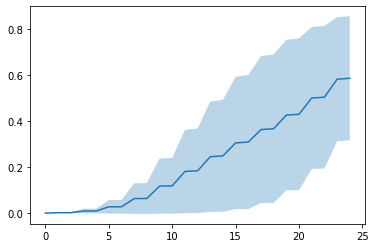

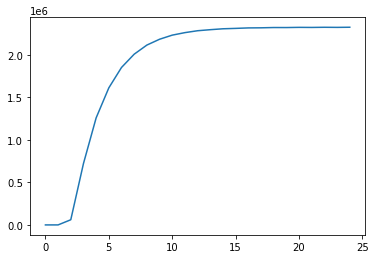

In [7]:
import matplotlib.pyplot as plt 

time = np.array([i for i in range(len(mean_frac_res))])/nCohorts


lower = mean_frac_res - std_frac_res
upper = mean_frac_res + std_frac_res
plt.figure()
plt.fill_between(time, lower, upper, alpha=.3)
plt.plot(time,mean_frac_res)


plt.figure()
plt.plot(time,total_pop)


# plt.plot(time,total_pop)


In [9]:
result_dict = {}

avg_std = {}
avg_std['mean_frac_res'] = mean_frac_res
avg_std['std_frac_res'] = std_frac_res
avg_std['total_pop'] = total_pop
avg_std['non_zero_frac'] = non_zero_fracs
avg_std['risk_integral'] = risk_integral


avg_std












{'mean_frac_res': array([1.99999999e-08, 1.64056452e-03, 1.64545214e-03, 8.96296714e-03,
        8.96419754e-03, 2.71858591e-02, 2.72738854e-02, 6.29394219e-02,
        6.34281570e-02, 1.17016812e-01, 1.18479740e-01, 1.81012555e-01,
        1.83754513e-01, 2.45142597e-01, 2.48804562e-01, 3.05127227e-01,
        3.09047545e-01, 3.63168674e-01, 3.66860921e-01, 4.26321589e-01,
        4.29717742e-01, 5.00431661e-01, 5.03974647e-01, 5.82071890e-01,
        5.86324310e-01]),
 'std_frac_res': array([0.        , 0.00183385, 0.0018313 , 0.00993338, 0.00993473,
        0.02962783, 0.02974004, 0.06656645, 0.06714175, 0.11993368,
        0.12150893, 0.18114466, 0.18394407, 0.23981745, 0.24347811,
        0.28803641, 0.29191414, 0.31945761, 0.32299723, 0.32754669,
        0.33029847, 0.30896668, 0.31037662, 0.27013379, 0.26974582]),
 'total_pop': array([1.00000000e+00, 8.91489416e+01, 6.06795330e+04, 7.21003866e+05,
        1.25768980e+06, 1.61033207e+06, 1.84972270e+06, 2.00578070e+06,
        2.

In [10]:
import pickle as pkl

result_dict['x755_25_alter'] = avg_std
## write the python object (dict) to pickle file
pkl.dump( result_dict, open( "x755_25_alter.pkl", "wb" ) )

In [11]:
import pickle as pkl

pkl.load(open('./x755_25_tilling.pkl', 'rb'))

{'x755_25_tilling': {'mean_frac_res': array([1.99999999e-08, 1.89019568e-04, 3.77357417e-04, 7.23032743e-04,
         1.14167505e-03, 1.66688101e-03, 2.33779779e-03, 7.14285714e-01,
         7.85714827e-01, 7.14285716e-01, 7.14285499e-01, 7.14285498e-01,
         7.14285498e-01, 6.78571321e-01, 6.78571213e-01, 6.78571213e-01,
         6.78571213e-01, 6.78571213e-01, 6.78571213e-01, 6.78571213e-01,
         6.78571213e-01, 6.78571213e-01, 6.78571213e-01, 6.78571213e-01,
         6.78571213e-01]),
  'std_frac_res': array([0.        , 0.000463  , 0.00092433, 0.00177106, 0.00279652,
         0.00408301, 0.00572641, 0.24743583, 0.33881397, 0.31134992,
         0.3113499 , 0.3113499 , 0.3113499 , 0.2901442 , 0.29014418,
         0.29014418, 0.29014418, 0.29014418, 0.29014418, 0.29014418,
         0.29014418, 0.29014418, 0.29014418, 0.29014418, 0.29014418]),
  'total_pop': array([1.00000000e+00, 3.32353130e+02, 9.68409015e+04, 8.25312190e+05,
         1.32598523e+06, 1.65976644e+06, 1.8820079